

## <center>**ENTREGA FINAL PROYECTO MINERIA DE DATOS**

### <center>**Nancy Alejandra Vinazco Morales  &  Maria Camila Perilla Gutierrez**
 



Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física.
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub 

# **Parte 1**

## **Variables** 


+ Genero

      Hombres = 0 
      Mujeres = 1

+ Edad 

      Número entero

+ Peso

      Medida en Kg

+ Altura 

      Medida en mts

+ Antecedentes familiares con sobrepeso

      No = 0 
      Yes = 1 

+ Consumo de alimentos ricos en calorias con frecuencia FAVC

      No = 0 
      Yes = 1 

+ Consumo verduras en comidas FCVC

      Nunca = 1
      Algunas veces = 2 
      Siempre = 3 
  
+ NCP

      Número de comidas principales que consume al día

+ Consumo de alimentos entre comidas  CAEC

      No = 0
      Algunas veces = 1
      Frecuentemente = 2
      Siempre = 3

+ Fuma

      No = 0 
      Yes = 1 

+ Consumo de agua diario CH2O

      Menos de un litro = 1
      Entre 1 y 2 L = 2
      Más de 2 L = 3

+ Monitoreo del consumo de calorias SCC

      No = 0 
      Yes = 1

+ Frecuencia de actividad física FAF

      no tengo = 0
      1 o 2 días = 1
      2 o 4 dias = 2
      4 o 5 días = 3

+ Tiempo usado en dispositivos tecnológicos TUE

      0-2 horas = 0
      3-5 horas = 1
      Más de 5 horas = 2

+ Consumo de alcohol CALC

      No bebo = 0
      Algunas veces = 1
      Frecuentemente = 2
      Siempre = 3

+ Transporte usado MTRANS

      Public_Transportation = 0 
      Automobile = 1
      Walking = 2
      Motorbike =  3
      Bike = 4

+ Nivel de obesidad

      Insufficient_Weight = 1
      Normal_Weight       = 1
      Overweight_Level_I  = 0
      Overweight_Level_II = 0
      Obesity_Type_I      = 0
      Obesity_Type_II     = 0
      Obesity_Type_III    = 0   

+ Índice de masa corporal

$$IMC = \frac{Peso}{Altura^2}$$



## **Data Set**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import statsmodels.api as sm
from statistics import mean
from vega_datasets import data
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
obesity = pd.read_csv('obesity_Final.csv',
                    sep=","
                 )

In [5]:
obesityF = obesity.drop(['Unnamed: 0'], axis=1)

In [6]:
obesityF['NObeyesdad'] = obesityF['NObeyesdad'].map(
    {'Insufficient_Weight': 1,
    'Normal_Weight' : 1,
    'Overweight_Level_I' : 0,
    'Overweight_Level_II' : 0,
    'Obesity_Type_I' : 0,
    'Obesity_Type_II' : 0,
    'Obesity_Type_III' : 0}) 
obesityF.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,0,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,28.342381


## **Rasgos constantes y cuasi constantes**

In [7]:
# Create X and y

columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17]
# Select only the numeric features
X = obesityF.iloc[:, columns].astype(np.float)

y = obesityF.iloc[:, -2] 

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X) 

print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

0


[]

No se identifico variables constantes 

In [9]:
sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 90% of observations approximately
sel.fit(X) 

print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

3


['Altura', 'Fuma', 'SCC']

El código identifico tres variables que tienen el 90% de sus observaciones iguales 

In [10]:
X["Altura"].value_counts() / np.float(len(X)) #*****

1.700000    0.028749
1.650000    0.023958
1.600000    0.020604
1.750000    0.018687
1.800000    0.013416
              ...   
1.650150    0.000479
1.780791    0.000479
1.703584    0.000479
1.811189    0.000479
1.739457    0.000479
Name: Altura, Length: 1574, dtype: float64

In [11]:
X["Fuma"].value_counts() / np.float(len(X))

0.0    0.978917
1.0    0.021083
Name: Fuma, dtype: float64

In [12]:
X["SCC"].value_counts() / np.float(len(X))

0.0    0.954001
1.0    0.045999
Name: SCC, dtype: float64

Dada la presencia de variables cuasi constantes, se eliminaran 'Fuma' y 'SCC' (monitoreo de consumo de calorias).

Es curioso que también se presente la variable 'Altura' como cuasi constante (y no tener evidencia de ello - linea 45), sin embargo, dentro del equipo de trabajo se decidio no eliminarla pues se considera que esta variable podria ser importante en el modelamiento.  

In [13]:
obesityFi = obesityF.drop(['Fuma','SCC'], axis=1)

In [14]:
obesityFi.head()

,Genero,Edad,Altura,Peso,Antec_familiares,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,2.0,0.0,1.0,0,0,1,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,3.0,0.0,1,0,1,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,2.0,2.0,1.0,2,0,1,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,2.0,2.0,0.0,2,2,0,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,2.0,0.0,0.0,1,0,0,28.342381


## **1. Selección de variables**

### **Ganancia de información**

In [15]:
# Create X and y

columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15]
# Select only the numeric features
X = obesityFi.iloc[:, columns].astype(np.float)

y = obesityFi.iloc[:, -2] 

In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
importances

array([0.        , 0.08261563, 0.11904216, 0.4340756 , 0.11068359,
       0.00587608, 0.00403387, 0.03081694, 0.11574657, 0.01106141,
       0.02244977, 0.00088103, 0.01110594, 0.00364038, 0.56367678])

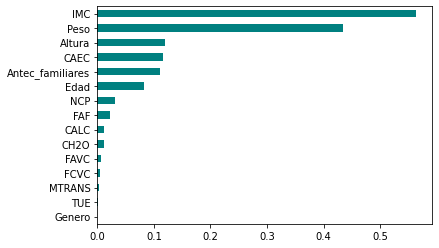

In [17]:
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind = 'barh',
                      color = 'teal'
                      )
plt.show()

Evaluando la ganancia de información, las 8 variables que mayor aportan información a la variable objetivo, son 'IMC' - 'Peso' - 'Altura' - 'CAEC' - 'Antec_familiares' - 'Edad' - 'NCP' - 'FAVC'

### **Prueba Chi Cuadrado**

In [18]:
# Create X variables categoricas

columns = [0,4,5,6,8,9,10,11,12,13]
# Select only the numeric features
X = obesityFi.iloc[:, columns].astype(np.float)

y = obesityFi.iloc[:, -2] 

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Convierte las características categóricas a enteros
X_cat = X.astype(int)

#Tres características con los chi cuadrados más altos son seleccionados
chi2_features = SelectKBest(chi2,k=5)
X_kbest_features = chi2_features.fit_transform(X_cat, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = chi2_features.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])


Variables seleccionadas:
Antec_familiares    float64
FAVC                float64
CAEC                float64
FAF                 float64
TUE                 float64
dtype: object

Número original de variables:  10
Número de variables seleccionadas:  5


De las anteriores variables mencionadas, se agrega al conjunto de variables a tener en cuenta, la variable 'FAF' y 'TUE' dado que tienen un mejor chi cuadrado.

### **Matriz de correlación con mapa de calor**

Para las variables cuantitativas

In [20]:
corr = obesityFi[['Edad', 'Altura','Peso','NCP','IMC','NObeyesdad']].corr()
corr

,Edad,Altura,Peso,NCP,IMC,NObeyesdad
Edad,1.000000,-0.031972,0.199063,-0.054799,0.241897,-0.334871
Altura,-0.031972,1.000000,0.457468,0.228681,0.124466,-0.113124
Peso,0.199063,0.457468,1.000000,0.088368,0.934494,-0.698291
NCP,-0.054799,0.228681,0.088368,1.000000,0.022066,0.109019
IMC,0.241897,0.124466,0.934494,0.022066,1.000000,-0.744935
NObeyesdad,-0.334871,-0.113124,-0.698291,0.109019,-0.744935,1.000000


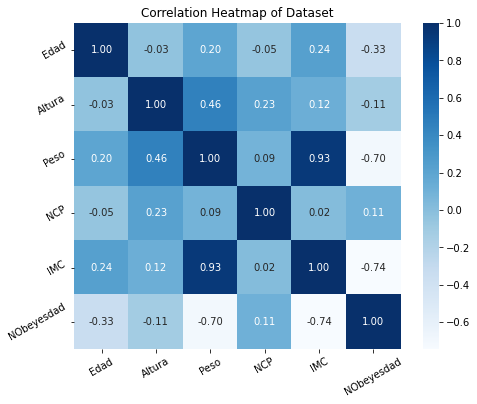

In [21]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='black', cmap="Blues")
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

Dadas las correlaciones se puede notar que la variable 'peso' con la variable 'IMC' son altamente correlacionadas (seguramente porque una fue en parte calculada con la otra), dado que nos estarian diciendo casi lo mismo para la explicación de la variable objetivo se decide eliminar una, en este caso la que menor se correlaciona con NObeyesdad es 'peso' por lo tanto se eliminara esa variable, además porque en metodos anteriores 'IMC' es una de las variables que más información aporta a la variable objetivo. 

In [22]:
 # Select inferior triangle of correlation matrix
infe = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(np.bool))
infe


,Edad,Altura,Peso,NCP,IMC,NObeyesdad
Edad,NaN,NaN,NaN,NaN,NaN,NaN
Altura,-0.031972,NaN,NaN,NaN,NaN,NaN
Peso,0.199063,0.457468,NaN,NaN,NaN,NaN
NCP,-0.054799,0.228681,0.088368,NaN,NaN,NaN
IMC,0.241897,0.124466,0.934494,0.022066,NaN,NaN
NObeyesdad,-0.334871,-0.113124,-0.698291,0.109019,-0.744935,NaN


In [23]:
infe = abs(infe)
infe

,Edad,Altura,Peso,NCP,IMC,NObeyesdad
Edad,NaN,NaN,NaN,NaN,NaN,NaN
Altura,0.031972,NaN,NaN,NaN,NaN,NaN
Peso,0.199063,0.457468,NaN,NaN,NaN,NaN
NCP,0.054799,0.228681,0.088368,NaN,NaN,NaN
IMC,0.241897,0.124466,0.934494,0.022066,NaN,NaN
NObeyesdad,0.334871,0.113124,0.698291,0.109019,0.744935,NaN


In [24]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in infe.columns if any(infe[column] > 0.9)]
print(to_drop)

['Peso']


In [25]:
obesityf1 = obesityFi.drop(["Genero", "Peso", "FCVC", "CH2O", "CALC", "MTRANS"], axis=1)

In [26]:
obesityf1.head(1)

,Edad,Altura,Antec_familiares,FAVC,NCP,CAEC,FAF,TUE,NObeyesdad,IMC
0,21.0,1.62,1,0,3.0,1,0.0,1.0,1,24.386526


### **Variables seleccionadas**

|Variables seleccionadas para el modelamiento|
|------------------------|
| IMC : Índice de masa corporal |
| Altura |
| Edad |
|Antec_familiares |
| CAEC : consumo de alimentos dentre comidas | 
| NCP : número de comidas principales al dia|
| FAVC : Consumo de alimentos ricos en calorias con frecuencia  |
| FAF : Frecuencia de actividad física |
| TUE : Tiempo usado en dispositivos tecnológicos |

## **2.  Conjuntos de datos desbalanceados**

### **Validación cruzada**

En relación con el método de validación cruzada a emplear, se ha decidido elegir el método de validación cruzada simple de la siguiente manera:

|VARIABLE DEPENDIENTE | DESCRIPCIÓN |
|------------------------| ------ |
| *NObeyesdad* | Niveles de obesidad |

|VARIABLES INDEPENDIENTES | DESCRIPCIÓN |
|------------------------| ------ |
| *IMC* | Índice de masa corporal |
| *Altura* | Altura de la persona |
| *Edad* | Edad de la persona |
|*Antec_familiares* | Antecedentes familiares de la persona |
| *CAEC* | Nonsumo de alimentos dentre comidas | 
| *NCP* | Número de comidas principales al dia|
| *FAVC* | Consumo de alimentos ricos en calorias con frecuencia  |
| *FAF* | Frecuencia de actividad física |
| *TUE* | Tiempo usado en dispositivos tecnológicos |

In [27]:
X = obesityf1.drop(["NObeyesdad"], axis=1).values
y = obesityf1["NObeyesdad"].values

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1669, 9) (418, 9) (1669,) (418,)


Se seleccionó un conjunto de entrenamiento del 80% del total de datos, lo que corresponde a 1669 registros, mientras que el conjunto de prueba o validación es del 20% correspondientes a 418 registros.

### **Observaciones Generales**

In [29]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

Se observa la cantidad de registros según su categoría, esto para la variable dependiente, donde 1225 personas tienen algún tipo de sobrepeso u obesidad (Clase 0), mientras que 444 personas tienen un peso bajo o normal (clase 1).

In [30]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.20, random_state=12)

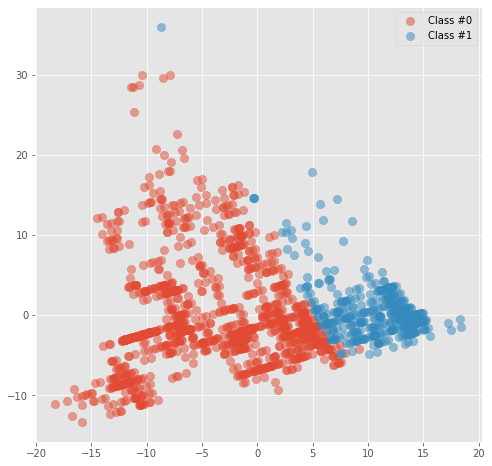

In [31]:
# Instanciar un objeto PCA para facilitar su visualización
pca = PCA(n_components = 2)

# Ajustar y transformar x para visualizar dentro de un espacio de características 2D
x_vis = pca.fit_transform(X_train_2)

# Visualizar los datos originales

def plot_two_classes(X_train_2, y_train_2, subplot=False, size=(8, 8)):
    # Visualizar las dos clases
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X_train_2[y_train_2==0, 0], X_train_2[y_train_2==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X_train_2[y_train_2==1, 0], X_train_2[y_train_2==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train_2)

In [32]:
pd.DataFrame(y_train).value_counts()

0    1225
1     444
dtype: int64

Observamos el desequilibrio que se encuentra, el cual es correspondiente a un 27% aproximadamente

In [33]:
print("Media para observar el desequilibrio:",y_train.mean())
print("Tamaño de los datos:",y_train.shape)

Media para observar el desequilibrio: 0.2660275614140204
Tamaño de los datos: (1669,)


### **Método de SMOTE**

El método empleado para la resolución del proyecto es una técnica de sobremuestreo - SMOTE, ya que se consideró el método más adecuado para evitar la perdida de información de la clase mayoritaria, puesto que los individuos tienen caracteristicas que se consideran importantes mantener en su totalidad, así mismo el método es adecuado para tener una mejor generalización del conjunto de datos.

Por medio de este método se puede evitar tener predicciones no adecuadas, así como evitar el sobreajuste en los modelos que se propongan, esto con el fin de tener un límite de desición claro y tener un máximo aprovechamiento de la situación.

In [34]:
n_samples = y_train.shape[0]
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()

In [35]:
def SMOTE(X_train, y_train, target_percentage=0.5, k=5, seed=1):
    # Calcula los NearestNeighbors
    from sklearn.neighbors import NearestNeighbors
    nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
    nearest_neighbour_.fit(X_train[y_train==1])
    nns = nearest_neighbour_.kneighbors(X_train[y_train==1], 
                                    return_distance=False)[:, 1:]
    
    # Nuevas muestras
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # Una matriz para almacenar las muestras sintéticas
    new = np.zeros((n_samples_1_new, X_train.shape[1]))
    
    # Crear semillas
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Seleccione los ejemplos a utilizar como base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y_train[y_train==1].shape[0], n_samples_1_new)
    
    # Definir semillas aleatorias (2 por ejemplo)
    np.random.seed(seeds[1])
    nn__=[]
    # Selecciona un vecino al azar para cada ejemplo para usarlo como base
    for i, sel in enumerate(sel_):
        nn__.append(np.random.choice(nns[sel]))
    
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # Para cada uno de los ejemplos seleccionados crear un caso sintético
    for i, sel in enumerate(sel_):
        # Seleccione el vecino
        nn_ = nn__[i]
        step = steps[i]
        # Crear una nueva muestra
        new[i, :] = X_train[y_train==1][sel] - step * (X_train[y_train==1][sel] - X_train[y_train==1][nn_])
    
    X_train = np.vstack((X_train, new))
    y_train = np.append(y_train, np.ones(n_samples_1_new))
    
    return X_train, y_train

A continuación se muestran las combinaciones realizadas para el método de SMOTE, esto con la variación del porcentaje de equilibrio y la cantidad de vecinos más cercanos, se puede evidenciar que los registros van logrando un equilibrio adecuado.

Target percentage 0.3 k  15
y.shape =  1750 y.mean() =  0.3


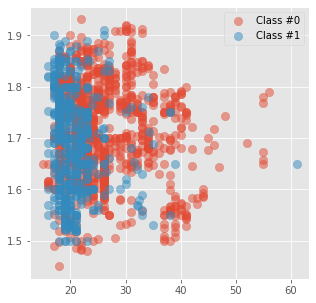

Target percentage 0.3 k  7
y.shape =  1750 y.mean() =  0.3


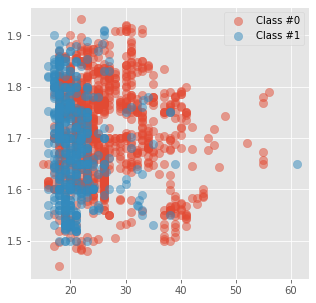

Target percentage 0.4 k  15
y.shape =  2041 y.mean() =  0.39980401763841256


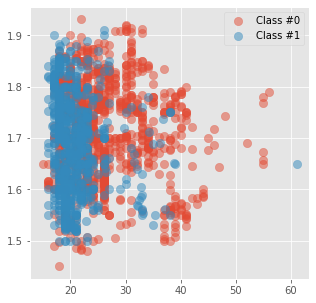

Target percentage 0.4 k  7
y.shape =  2041 y.mean() =  0.39980401763841256


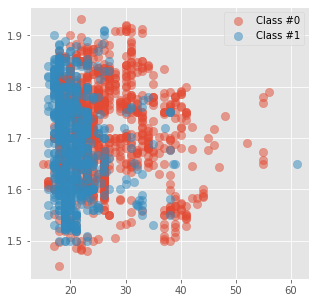

Target percentage 0.5 k  15
y.shape =  2450 y.mean() =  0.5


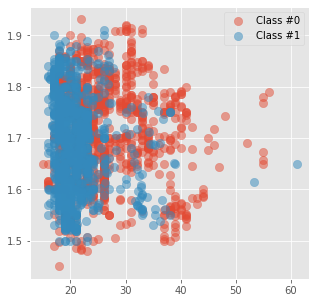

Target percentage 0.5 k  7
y.shape =  2450 y.mean() =  0.5


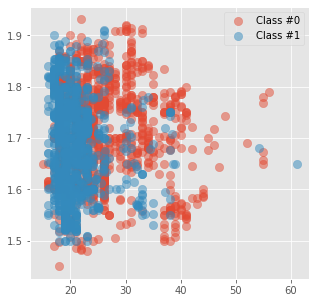

In [36]:
for target_percentage in [0.30, 0.40, 0.50]:
    for k in [15, 7]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean()) 
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show()

Através del método de SMOTE, se decide elegir la combinación de las siguientes características:
* Un porcentaje de equilibrio del 0.5 
* 7 Vecinos más cercanos 

In [37]:
y_train2 = pd.DataFrame(y_u)
y_test2 = pd.DataFrame(y_test)
X_train2 = pd.DataFrame(X_u)
X_test2 = pd.DataFrame(X_test)

In [38]:
y_train2.columns = ["NObeyesdad"]
y_test2.columns = ["NObeyesdad"]

X_train2.columns = ["Edad", "Altura", "Antec_familiares", "FAVC", "NCP", "CAEC", "FAF", "TUE", "IMC"]
X_test2.columns = ["Edad", "Altura", "Antec_familiares", "FAVC", "NCP", "CAEC", "FAF", "TUE", "IMC"]

Ya que la técnica es únicamente aplicada en el conjunto de entrenamiento, al aplicar la técnica SMOTE el nuevo conjunto de entrenamiento corresponde a un total de 2450 registros

In [39]:
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(2450, 9) (418, 9) (2450, 1) (418, 1)


Se muestran las modificaciones realizadas aplicando el método SMOTE, la clase minoritaria 1 ahora posee la misma cantidad de registros que la clase 0, logrando así un equilibrio adecuado del 50% para el conjunto de entrenamiento

In [40]:
y_train2.value_counts()

NObeyesdad
1.0           1225
0.0           1225
dtype: int64

Finalmente se observa el dataset final, con el cual se realizará el modelamiento, este dataset ahora contiene 2868 registros con 10 variables

In [41]:
df1 = pd.concat([y_train2, X_train2], axis = 1)
df2 = pd.concat([y_test2, X_test2], axis = 1)

In [42]:
df3 = pd.concat([df1, df2]); df3

,NObeyesdad,Edad,Altura,Antec_familiares,FAVC,NCP,CAEC,FAF,TUE,IMC
0,1.0,26.0,1.900000,1.0,1.0,3.0,2.0,1.0,0.0,22.160665
1,1.0,22.0,1.711467,1.0,1.0,3.0,2.0,2.0,1.0,17.741005
2,0.0,23.0,1.739991,1.0,1.0,3.0,1.0,1.0,1.0,44.089992
3,0.0,20.0,1.620109,1.0,1.0,1.0,1.0,0.0,1.0,39.391648
4,1.0,20.0,1.760000,1.0,1.0,4.0,1.0,2.0,2.0,17.755682
...,...,...,...,...,...,...,...,...,...,...
413,0.0,18.0,1.735461,1.0,1.0,3.0,1.0,2.0,1.0,42.100115
414,0.0,18.0,1.799779,1.0,1.0,1.0,1.0,1.0,2.0,33.630040
415,1.0,19.0,1.564199,0.0,1.0,2.0,1.0,2.0,1.0,17.205110
416,0.0,24.0,1.609418,1.0,1.0,2.0,1.0,1.0,1.0,38.636920


In [43]:
df3.to_csv("obesity_Final2.csv") 